<a href="https://colab.research.google.com/github/belhouariayoub/PROJETEMBIA/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import sys, os, array, time
import numpy as np
import matplotlib.pyplot as plt
import IPython

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dropout,Dense
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.gen_array_ops import mirror_pad_eager_fallback

from sklearn.utils import shuffle



In [106]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/EMBEDDEDIA/Saline_bottle_original_size/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EMBEDDEDIA/Saline_bottle_original_size


In [153]:
!ls

data_label		   resize_sal_data_temp_del  sal_data_80     X_org.npy
Model.h5		   sal_data_100		     sal_data_empty  Y_org.npy
resize_sal_data_augmented  sal_data_50		     test.jpg


In [108]:
X_data = []
Y_data = []
X_data=np.load('X_org.npy')/255
Y_data=np.load('Y_org.npy')
X, Y = shuffle(X_data,Y_data)
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0)
#x_train=x_train.reshape(-1,64,64,3)
#x_test=x_test.reshape(-1,64,64,3)
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
#x_train=np.reshape(x_train,(3162,-1))

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(64,64,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])



In [133]:
x_train[0].shape

(64, 64, 3)

In [111]:
# Small CNN for MNIST recognition
model = models.Sequential()
# Dense layer
#model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(64,64,3)))
# model.add(layers.MaxPooling2D((2, 2), padding='valid'))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
model.add(Dropout(0.2))     
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), padding='valid'))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_46 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_67 (Conv2D)          (None, 31, 31, 64)        36928     
                                                     

33/33 - 6s - loss: 0.5615 - accuracy: 0.8806 - 6s/epoch - 185ms/step


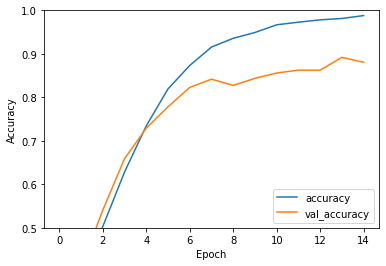

In [114]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [115]:
model.save_weights('Model.h5')


In [154]:
from PIL import Image
import PIL.ImageOps  
import cv2
from PIL import Image as pil_image

img=pil_image.open("test.jpg")
np_im = np.array(img)/255


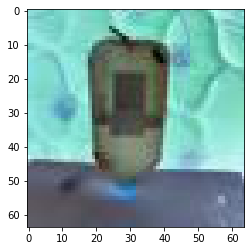

In [155]:
plt.imshow(np_im.reshape(64,64,3))

In [156]:
np_im=np_im.reshape(1,64,64,3)

In [158]:
prediction = model.predict(np_im)
prediction

array([[8.8855252e-08, 9.9977344e-01, 8.4654705e-05, 1.4180593e-04]],
      dtype=float32)